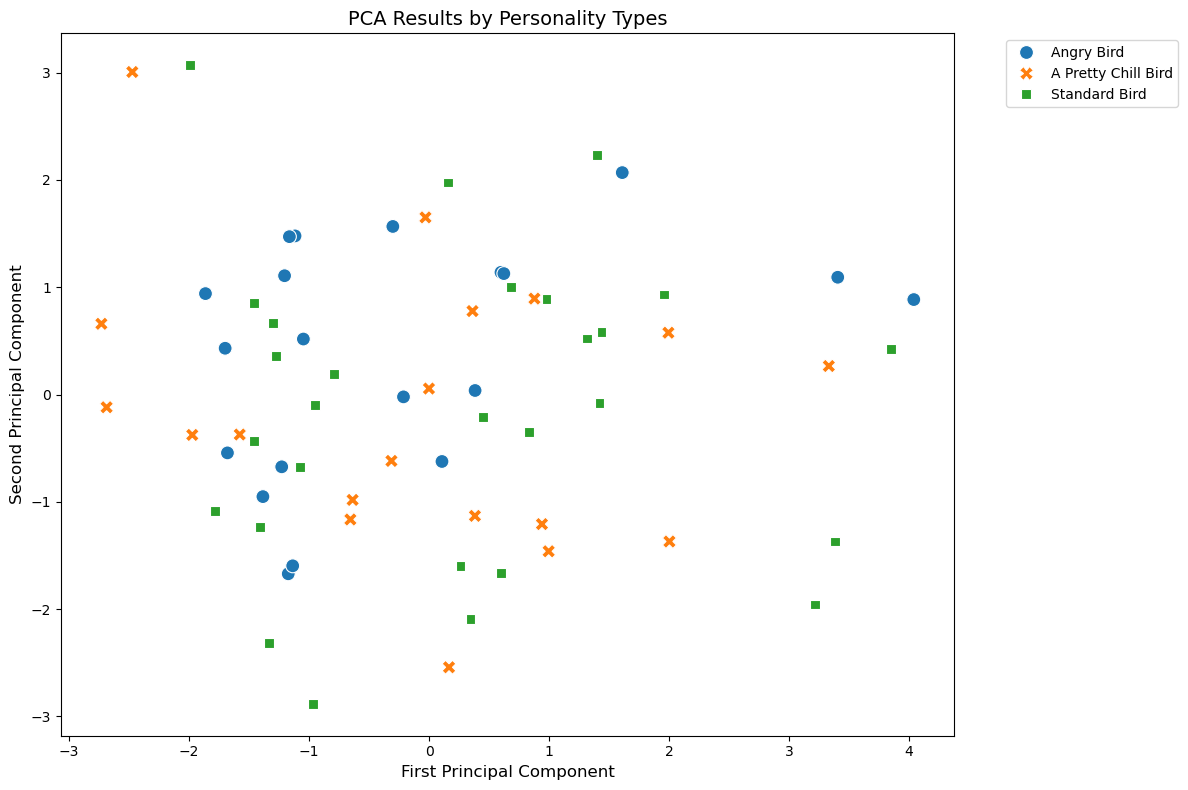

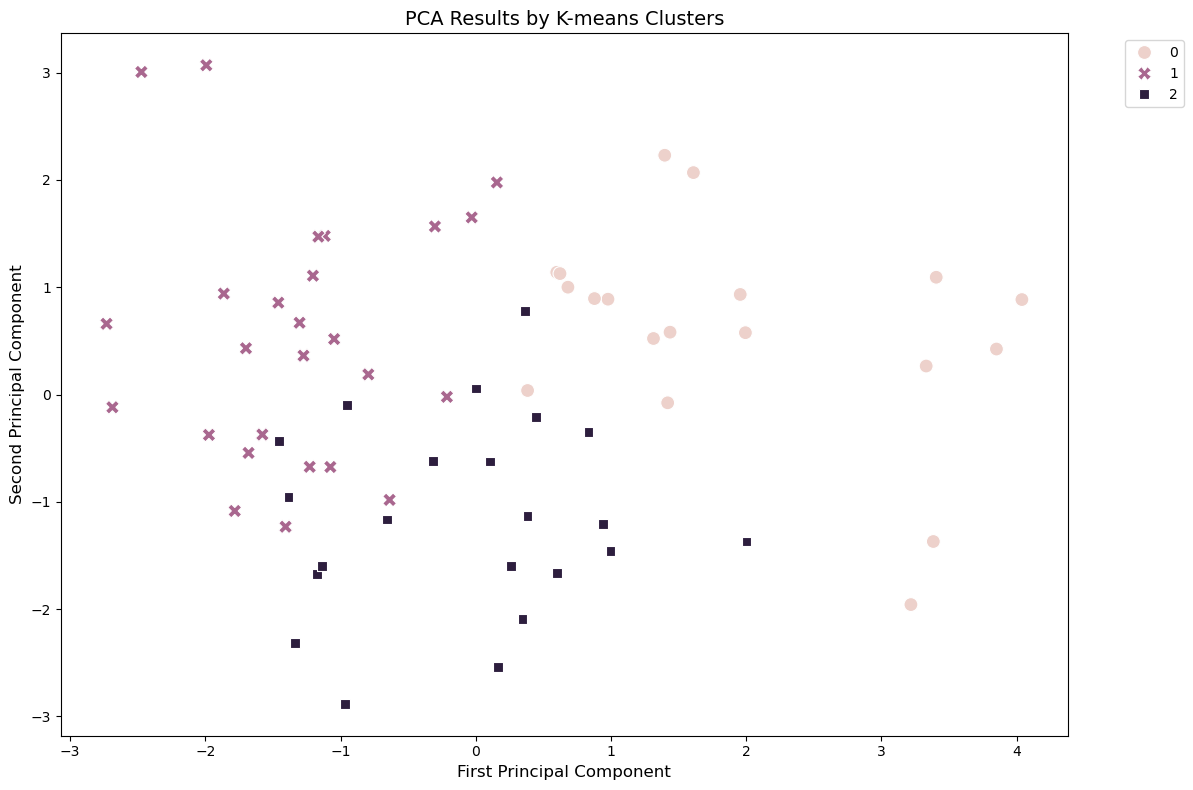

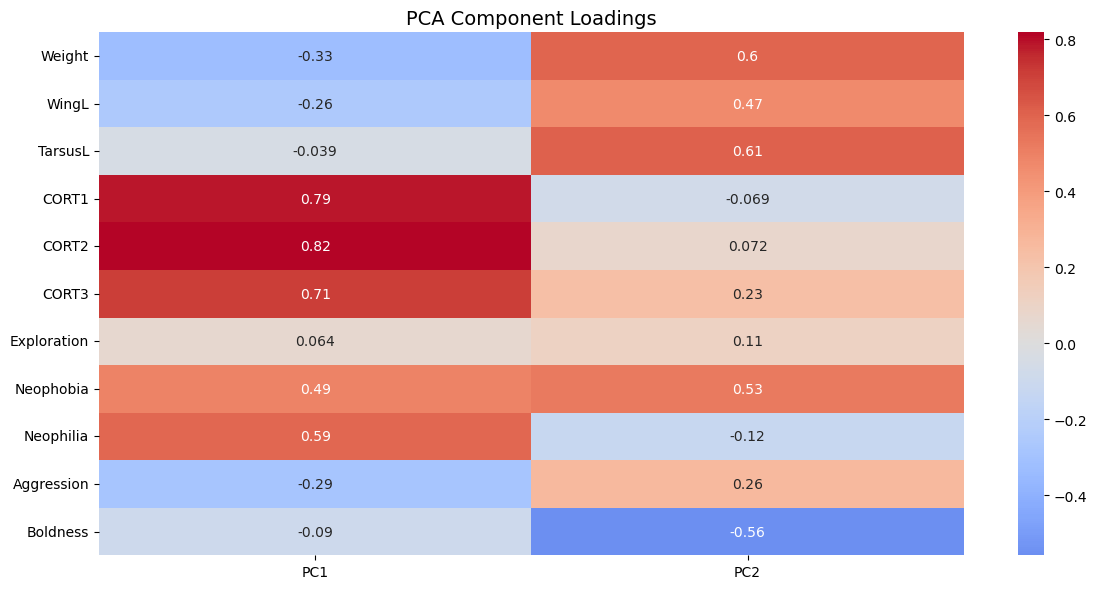


Cluster vs Personality Type Comparison:
Cluster               0   1  2
Personality                   
A Pretty Chill Bird   3   7  9
Angry Bird            6  10  4
Standard Bird        10   9  9

Explained variance ratio:
PC1: 0.238
PC2: 0.151
Total: 0.389

Most important variables for cluster separation:

Cluster 0 characteristics:
CORT2        1.037117
Neophobia    0.912291
CORT1        0.884111
Name: 0, dtype: float64

Cluster 1 characteristics:
Weight        0.700552
TarsusL       0.424360
Aggression    0.224835
Name: 1, dtype: float64

Cluster 2 characteristics:
Boldness       0.305156
Exploration    0.294383
Neophilia      0.165392
Name: 2, dtype: float64


In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
birds = pd.read_csv("week-4/download-6.csv")

# Select numeric columns for analysis
numeric_cols = ['Weight', 'WingL', 'TarsusL', 'CORT1', 'CORT2', 'CORT3', 
                'Exploration', 'Neophobia', 'Neophilia', 'Aggression', 'Boldness']
X = birds[numeric_cols]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
birds['Cluster'] = clusters

# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(X_scaled)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result[:, :2], columns=['PC1', 'PC2'])
pca_df['Personality'] = birds['Personality']
pca_df['Cluster'] = clusters

# Plot 1: PCA with Personality Types
plt.figure(figsize=(12, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Personality', style='Personality', s=100)
plt.title('PCA Results by Personality Types', fontsize=14)
plt.xlabel('First Principal Component', fontsize=12)
plt.ylabel('Second Principal Component', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plot 2: PCA with Clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', style='Cluster', s=100)
plt.title('PCA Results by K-means Clusters', fontsize=14)
plt.xlabel('First Principal Component', fontsize=12)
plt.ylabel('Second Principal Component', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Feature importance for PCA
plt.figure(figsize=(12, 6))
loadings = pd.DataFrame(
    pca.components_.T * np.sqrt(pca.explained_variance_),
    columns=[f'PC{i+1}' for i in range(pca.components_.shape[0])],
    index=numeric_cols
)
sns.heatmap(loadings.iloc[:, :2], annot=True, cmap='coolwarm', center=0)
plt.title('PCA Component Loadings', fontsize=14)
plt.tight_layout()
plt.show()

# Print analysis results
print("\nCluster vs Personality Type Comparison:")
print(pd.crosstab(birds['Personality'], birds['Cluster']))

print("\nExplained variance ratio:")
print(f"PC1: {pca.explained_variance_ratio_[0]:.3f}")
print(f"PC2: {pca.explained_variance_ratio_[1]:.3f}")
print(f"Total: {sum(pca.explained_variance_ratio_[:2]):.3f}")

# Analyze variable importance for clustering
cluster_centers = pd.DataFrame(
    kmeans.cluster_centers_,
    columns=numeric_cols
)
print("\nMost important variables for cluster separation:")
for i in range(3):
    print(f"\nCluster {i} characteristics:")
    print(cluster_centers.iloc[i].nlargest(3))

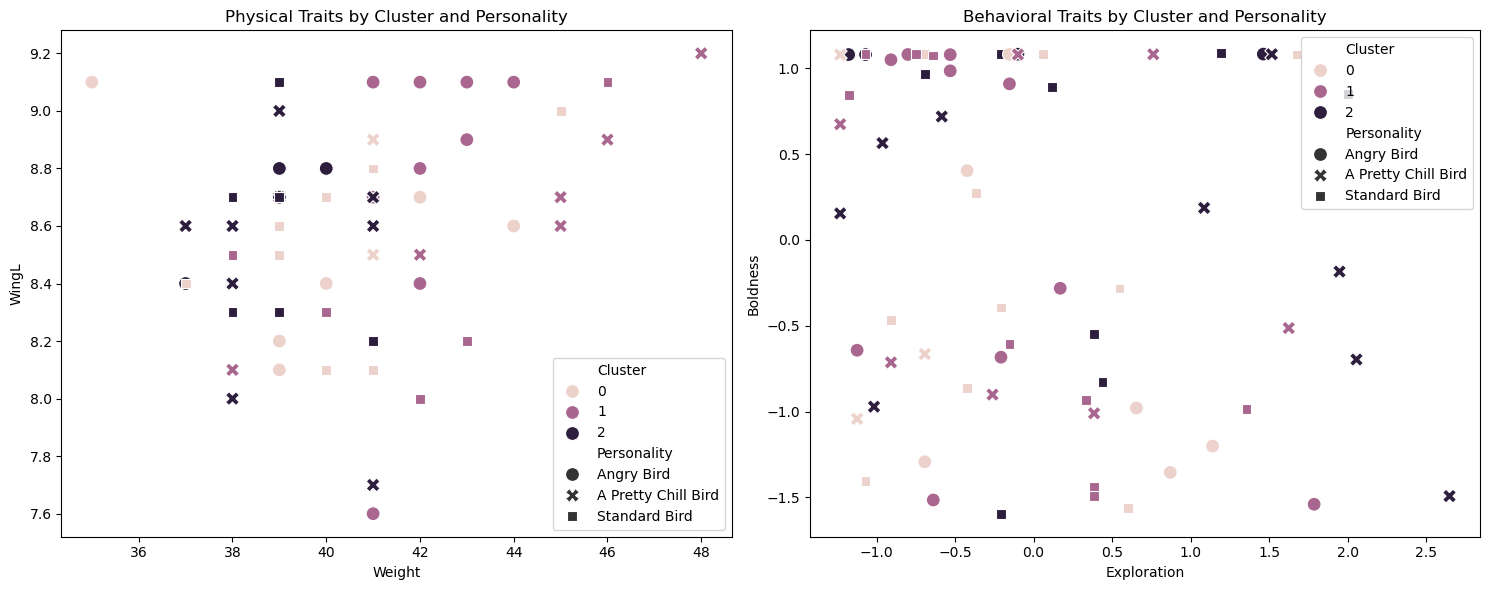

Figure 1: Cluster analysis results showing the relationship between k-means clusters and personality types. Left panel shows physical measurements (Weight vs Wing Length) where clusters show poor alignment with personality types. Right panel shows behavioral traits (Exploration vs Boldness) where clusters demonstrate stronger alignment with personality types, particularly for the 'Angry Bird' personality type.


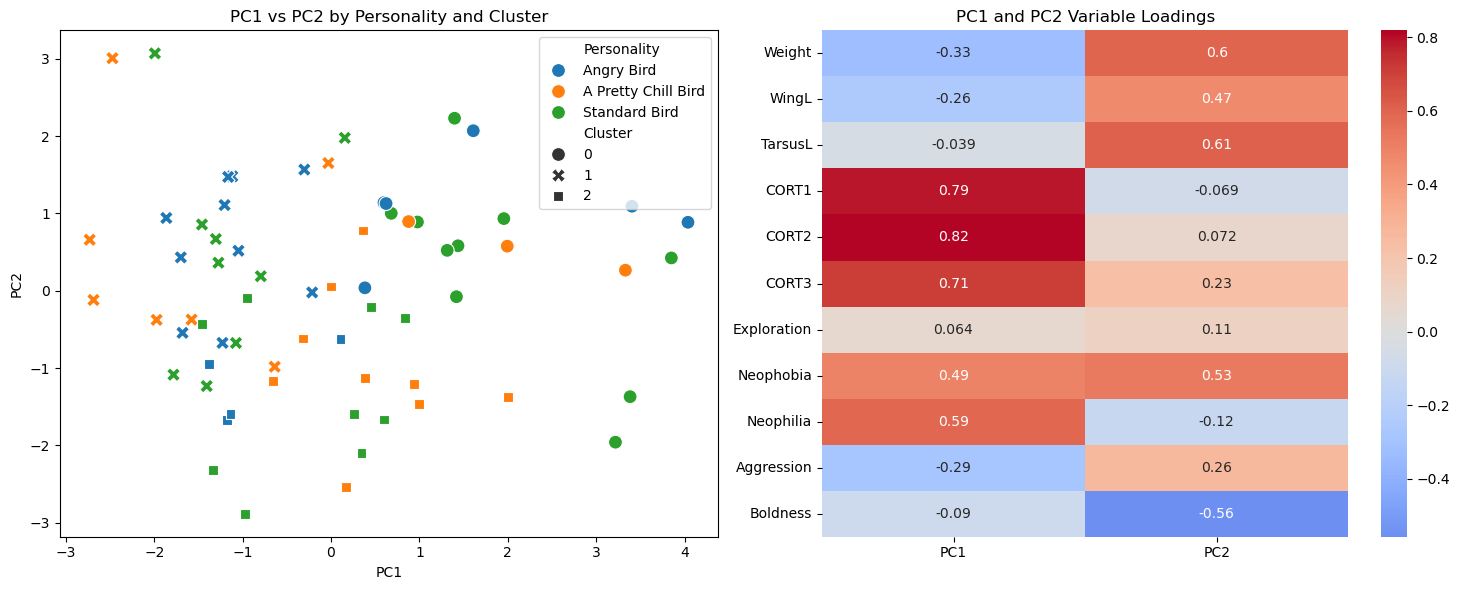

Figure 2: Principal Component Analysis results. Left panel shows the first two principal components with points colored by personality type and shaped by cluster assignment. The behavioral variables show stronger separation along PC1, while physical measurements contribute more to PC2. Right panel shows the loading scores for each variable on PC1 and PC2, highlighting that behavioral traits (Exploration, Boldness, Neophobia) have the strongest influence on the principal components.

Interpretation:
The cluster analysis reveals that behavioral traits are more effective at distinguishing between personality types than physical measurements. The PCA confirms this finding, with behavioral variables showing higher loading scores on the first principal component. While there is some alignment between clusters and personality types, the overlap suggests that the original personality classifications may be capturing additional nuances not fully represented by the measured variables. The first 

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Read and prepare data
birds = pd.read_csv("week-4/download-6.csv")
numeric_cols = ['Weight', 'WingL', 'TarsusL', 'CORT1', 'CORT2', 'CORT3', 
                'Exploration', 'Neophobia', 'Neophilia', 'Aggression', 'Boldness']
X = birds[numeric_cols]

# Scale data and perform analyses
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
birds['Cluster'] = clusters

pca = PCA()
pca_result = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])
pca_df['Personality'] = birds['Personality']
pca_df['Cluster'] = clusters

# Figure 1: Cluster Analysis Visualization
plt.figure(figsize=(15, 6))

# Panel 1: Physical traits
plt.subplot(1, 2, 1)
sns.scatterplot(data=birds, x='Weight', y='WingL', hue='Cluster', style='Personality', s=100)
plt.title('Physical Traits by Cluster and Personality')

# Panel 2: Behavioral traits
plt.subplot(1, 2, 2)
sns.scatterplot(data=birds, x='Exploration', y='Boldness', hue='Cluster', style='Personality', s=100)
plt.title('Behavioral Traits by Cluster and Personality')

plt.tight_layout()
plt.show()

# Caption for Figure 1:
print("Figure 1: Cluster analysis results showing the relationship between k-means clusters and personality types. Left panel shows physical measurements (Weight vs Wing Length) where clusters show poor alignment with personality types. Right panel shows behavioral traits (Exploration vs Boldness) where clusters demonstrate stronger alignment with personality types, particularly for the 'Angry Bird' personality type.")

# Figure 2: PCA Analysis
plt.figure(figsize=(15, 6))

# Panel 1: PC1 vs PC2 scatter
plt.subplot(1, 2, 1)
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Personality', style='Cluster', s=100)
plt.title('PC1 vs PC2 by Personality and Cluster')

# Panel 2: Variable loadings
loadings = pd.DataFrame(
    pca.components_.T * np.sqrt(pca.explained_variance_),
    columns=[f'PC{i+1}' for i in range(pca.components_.shape[0])],
    index=numeric_cols
)
plt.subplot(1, 2, 2)
sns.heatmap(loadings.iloc[:, :2], annot=True, cmap='coolwarm', center=0)
plt.title('PC1 and PC2 Variable Loadings')

plt.tight_layout()
plt.show()

# Caption for Figure 2:
print("Figure 2: Principal Component Analysis results. Left panel shows the first two principal components with points colored by personality type and shaped by cluster assignment. The behavioral variables show stronger separation along PC1, while physical measurements contribute more to PC2. Right panel shows the loading scores for each variable on PC1 and PC2, highlighting that behavioral traits (Exploration, Boldness, Neophobia) have the strongest influence on the principal components.")

# Brief Interpretation
print("\nInterpretation:")
print("The cluster analysis reveals that behavioral traits are more effective at distinguishing between personality types than physical measurements. The PCA confirms this finding, with behavioral variables showing higher loading scores on the first principal component. While there is some alignment between clusters and personality types, the overlap suggests that the original personality classifications may be capturing additional nuances not fully represented by the measured variables. The first two principal components explain approximately {:.1f}% of the total variance, with behavioral traits being the primary drivers of separation.".format(
    sum(pca.explained_variance_ratio_[:2]) * 100
))